### Actividad 9 modulo 5

Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa,  un  banco,  una  tienda,  etcétera)  puede mejorar  la  experiencia  de  cliente  desarrollando  productos  personalizados  en  pos  de  las  preferencias  y  necesidades de cada uno de sus clientes.

En la última campaña a cada cliente se le ofreció un producto personalizado en  base  a  su  comportamiento  financiero,  preferencias,  capacidad  de  pago  y  necesidades. La variable target corresponde a Personal Loan el cual indica si el cliente  tomó  o  no  tomó  este  producto  (¿El  cliente  aceptó  o  no  el  producto  ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.

Es  de  interés  analizar  cuáles  pudieran  ser  los  perfiles  de  clientes  que  tienen  mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a  los  clientes  con  dichas  características  y  priorizarlos  a  ellos  en  las  próximas  campañas.

#### a)  Cargue  el  set  de  datos  utilizando  la  función  read.excel  de  pandas.  ¿Qué  columnas  le  hacen  sentido  incluir  en  un  modelo  para  predecir  si  un  cliente  tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde que puede usar la función drop('nombre columna a eliminar', axis=1).



In [1]:
import pandas as pd

In [93]:
df = pd.read_csv("Data.csv")

In [3]:
df.sample(3)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
789,790,29,31,92126,4,"0,30",2,0,0
4896,4897,40,81,94304,2,"0,40",1,0,0
2888,2889,55,39,94542,3,"1,00",2,0,0


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
mascara_loan_zero = df["Personal Loan"] == 0
# ['Age', 'Income', 'ZIP', 'Code', 'Family', 'CCAvg', 'Education', 'Mortgage']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5000 non-null   int64 
 1   Age            5000 non-null   int64 
 2   Income         5000 non-null   int64 
 3   ZIP Code       5000 non-null   int64 
 4   Family         5000 non-null   int64 
 5   CCAvg          5000 non-null   object
 6   Education      5000 non-null   int64 
 7   Mortgage       5000 non-null   int64 
 8   Personal Loan  5000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 351.7+ KB


In [98]:
df["CCAvg"]=df["CCAvg"].str.replace(",",".").astype(float)

In [85]:
# Cantidad de valores por variable
for i in df:
    print(i,":",df[i].value_counts().shape[0])

ID : 5000
Age : 45
Income : 162
ZIP Code : 467
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
Personal Loan : 2


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

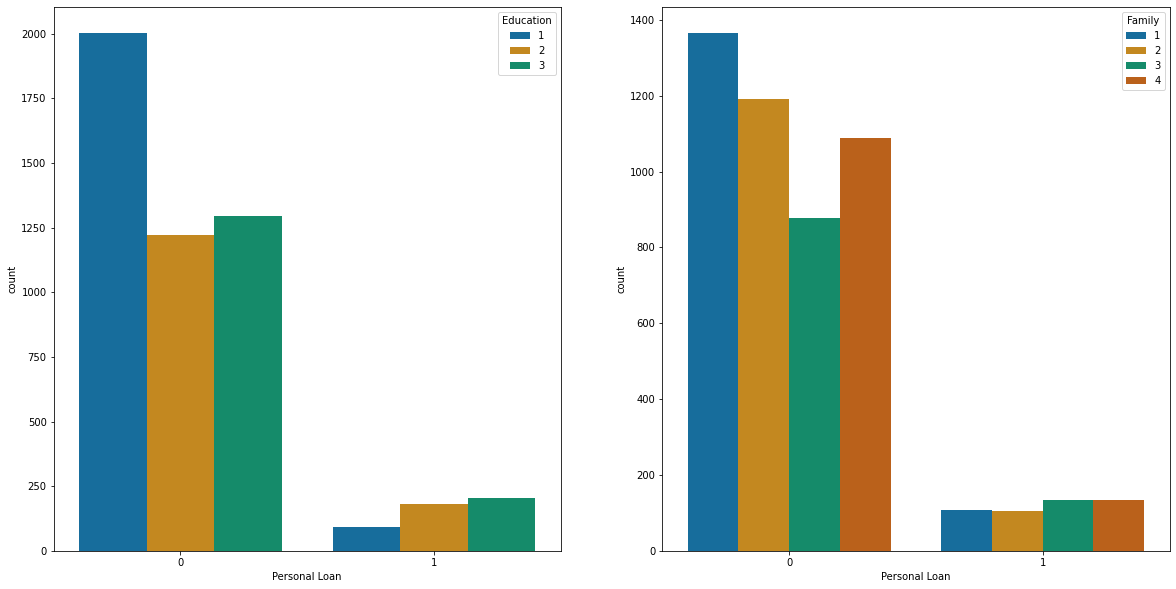

In [72]:
#Analisis grafico Personal Loan = 0
fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.countplot(
    x="Personal Loan",
    data=df,
    hue="Education",
    palette="colorblind", ax = axs[0]
)

sns.countplot(
    x="Personal Loan",
    data=df,
    hue="Family",
    palette="colorblind", ax = axs[1]
)


<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

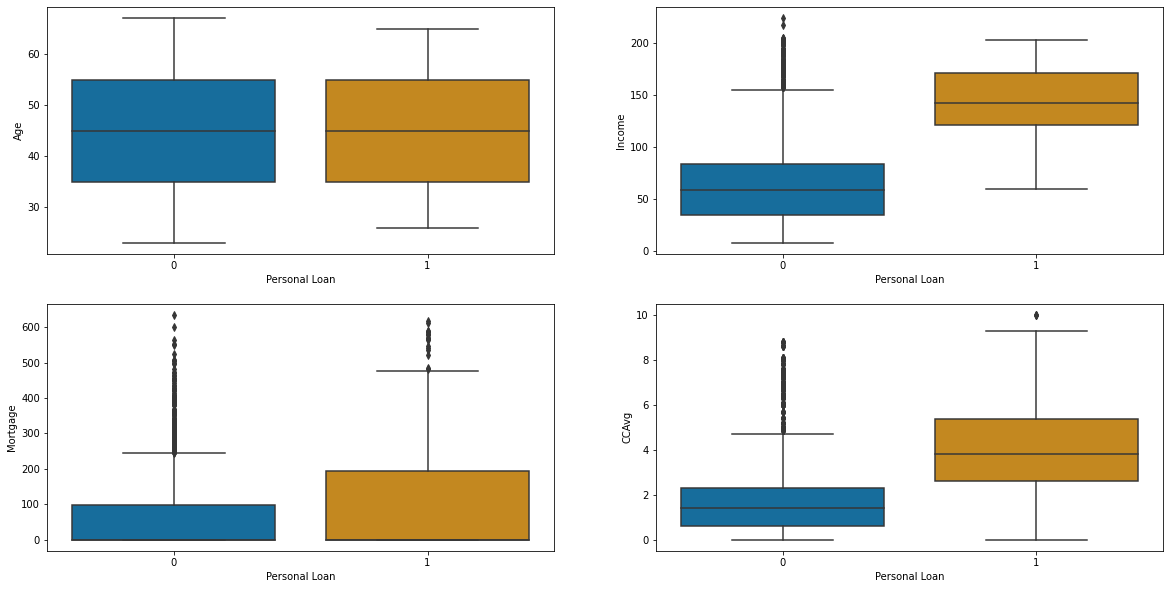

In [99]:
#Analisis grafico Personal Loan = 0
fig, axs = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(
    x="Personal Loan",
    data=df,
    y="Age",
    palette="colorblind", ax = axs[0,0]
)

sns.boxplot(
    x="Personal Loan",
    data=df,
    y="Income",
    palette="colorblind", ax = axs[0,1]
)

sns.boxplot(
    x="Personal Loan",
    data=df,
    y="Mortgage",
    palette="colorblind", ax = axs[1,0]
)

sns.boxplot(
    x="Personal Loan",
    data=df,
    y="CCAvg",
    palette="colorblind", ax = axs[1,1]
)

Del analisis grafico podemos inferir que la edad no es un factor determinante para definir si una persona adquirira o no el producto al igual que la variable Family que junto con ID y Zip Code son las variables que sacaria de las variables de entrenamiento.

#### b) Determine cuáles son las variables predictoras que son categorías y obtenga las   variables   dummies   correspondientes   para   incluirlas   en   el   modelo.   Recuerde que puede usar la función get_dummies() de pandas.

In [166]:
df_X = df.drop(columns=["Age","ID","ZIP Code","Personal Loan"])
df_Y = df["Personal Loan"]

df_X["Education"] = df_X["Education"].astype(str).replace({'1':"bajo","2":"medio","3":"alto"})

Del item anterior determinamos por medio de count value que las Variables categoricas son: Education y Family

In [167]:
#df_X = df_X.drop(columns=["Education"])
dummies = pd.get_dummies(df_X["Education"])
df_X = df_X.drop(columns=["Education"], axis=1)
df_X = pd.concat([df_X,dummies], axis=1)
df_X.sample()

,Income,Family,CCAvg,Mortgage,alto,bajo,medio
4522,29,1,0.3,0,0,1,0


#### c) Defina en un objeto X las variables predictoras y en Y la variable respuesta Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción 5:1. Recuerde que la función train_test_split() es útil para realizar split simple, además fije una semilla 2021 (random_state=2021 en la función train_test_split()).

In [119]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.8, random_state=2021)

#### d) Obtenga un árbol de decisión con el set de datos de entrenamiento. Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido, ¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿que alternativas pudieran probarse para abordar este problema?

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [171]:
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [173]:
y_pred = modelo_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:",mse)

MSE: 0.013


#### e) Plantee otro árbol de decisión pero definiendo como parámetro de control o prepoda la profundidad máxima del árbol, para esto en la función DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad máxima 2). 

#### Obtenga el MSE en el set de prueba y compare con el modelo anterior. Observe el árbol obtenido. Comente.

In [174]:
modelo_tree_2 = DecisionTreeClassifier(max_depth=2)
modelo_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [177]:
y_pred_2 = modelo_tree_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
print("MSE 2:",mse_2)

MSE 2: 0.031


#### f) Busque los mejores valores de los criterios de corte y máxima profundidad para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint: evalue los hiperparámetros criterion y max_depth)